## Proyecto Final | Visualización de datos generados con MOEA/D por medio de PCA y POM

Reconocimiento de patrones <br>
Profesor Hugo Hidalgo <br>

César Miguel Valdez Córdova <br>
Luis Enrique García Hernandez

17 Abril 2018

In [2]:
%load_ext rpy2.ipython

In [3]:
#Cargamos extensiones para el uso de R desde este Jupyter Notebook
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
#Funcinones y paquetes específicos de R
## no fueron utilizados al final
base = importr('base')
kohonen = importr('kohonen')
r = robjects.r
pandas2ri.activate()
#Algunos paquetes de python
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt


### Hacer un análisis de cluster usando SOM y PCA, para ver si los clusters que encuentran estos métodos están relacionados con los que encuentra el algoritmo evolutivo.

In [12]:
%%R -o yeast_data,human_data,X_cancer_train,y_cancer_train,X_cancer_test,y_cancer_test
#Cárgamos los datos 
#Línfoma de humano
human_data <- read.csv('Human.csv')
human_data <- human_data[,-1]

#Levadura
yeast_data <- read.csv('Yeast.csv')
yeast_data <- yeast_data[,-1]

#Conjunto de entrenamiento de cáncer
X_cancer_train <- read.table('14cancer.xtrain')
y_cancer_train <- read.table('14cancer.ytrain')

#Conjunto de prueba de cáncer
X_cancer_test <- read.table('14cancer.xtest')
y_cancer_test <- read.table('14cancer.ytest')

Guardamos los nombres de los genes que venian en los datos de humano y levadura como datos adicionales

In [13]:
%%R -o human_data_names,yeast_data_names,human_data,yeast_data
human_data_names <- human_data[,1]
human_data <- human_data[,-1]

yeast_data_names <- yeast_data[,1]
yeast_data <- yeast_data[,-1]

# Datos Originales

### Comenzamos por crear clusters para visualizar por medio del PCA

Importamos paquete PCA de sklearn

In [14]:
from sklearn.decomposition import PCA

### Datos de Levadura

In [15]:
pca = PCA(n_components = 2)
yeast_pca_train = pca.fit_transform(yeast_data)
yeast_explained_variance = pca.explained_variance_ratio_

In [16]:
yeast_explained_variance

array([0.92422899, 0.01846558])

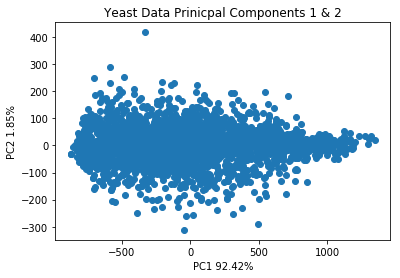

In [17]:
plt.scatter(yeast_pca_train[:,0],
            yeast_pca_train[:,1])
plt.xlabel('PC1'+ ' ' + 
           str(("%.2f" % (yeast_explained_variance[0]*100))+'%'))
plt.ylabel('PC2'+ ' ' + 
           str(("%.2f" % (yeast_explained_variance[1]*100))+'%'))
plt.title('Yeast Data Prinicpal Components 1 & 2')
plt.show()

### Datos de Humano

In [18]:
pca = PCA(n_components = 2)
human_pca_train = pca.fit_transform(human_data)
human_explained_variance = pca.explained_variance_ratio_

In [19]:
human_explained_variance

array([0.06960953, 0.05253   ])

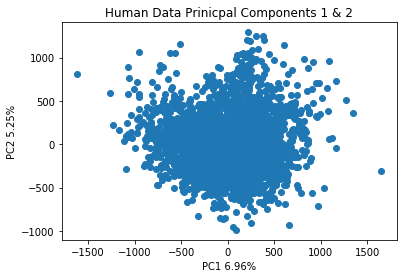

In [20]:
plt.scatter(human_pca_train[:,0],
            human_pca_train[:,1])
plt.xlabel('PC1'+ ' ' + 
           str(("%.2f" % (human_explained_variance[0]*100))+'%'))
plt.ylabel('PC2'+ ' ' + 
           str(("%.2f" % (human_explained_variance[1]*100))+'%'))
plt.title('Human Data Prinicpal Components 1 & 2')
plt.show()

### Datos de Cáncer

In [21]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(np.asarray(X_cancer_train.T))
X_test = pca.transform(np.asarray(X_cancer_test.T))
cancer_explained_variance = pca.explained_variance_ratio_

In [22]:
cancer_explained_variance

array([0.45955493, 0.13323254])

In [23]:
#Utilizaremos regresión logística para 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,np.asarray(y_cancer_train.T).ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(np.asarray(y_cancer_test.T).ravel(),y_pred)

In [27]:
labels = ['breast','prostate','lung','collerectal',
                  'lymphoma','bladder','melanoma','uterus',
                  'leukemia','renal','pancreas','ovary',
                  'meso','cns']
cancer_keys = list(map(str,range(14)))
cancer_dict = dict(zip(cancer_keys,labels))

In [28]:
cm = pd.DataFrame(cm)
cm['labels'] = labels
cm.index = cm['labels']
cm = cm.iloc[:, :-1]
cm.columns = labels
cm

,breast,prostate,lung,collerectal,lymphoma,bladder,melanoma,uterus,leukemia,renal,pancreas,ovary,meso,cns
labels,,,,,,,,,,,,,,
breast,3,0,0,0,0,0,0,0,1,0,0,0,0,0
prostate,0,0,0,0,1,0,0,1,1,0,0,0,0,3
lung,0,0,0,0,1,0,0,1,1,0,0,0,0,1
collerectal,0,0,0,0,1,0,0,3,0,0,0,0,0,0
lymphoma,1,0,0,0,1,0,0,0,1,0,0,0,0,3
bladder,3,0,0,0,0,0,0,0,0,0,0,0,0,0
melanoma,1,0,0,0,1,0,0,0,0,0,0,0,0,0
uterus,1,0,0,0,0,0,0,1,0,0,0,0,0,0
leukemia,0,0,0,0,0,0,0,0,6,0,0,0,0,0


In [29]:
label_color_dict = {'breast':'g',
                    'prostate':'green',
                    'lung':'blue',
                    'collerectal':'coral',
                    'lymphoma':'ivory',
                    'bladder':'lavender',
                    'melanoma':'papayawhip',
                    'uterus':'aqua',
                    'leukemia':'k',
                    'renal':'seagreen',
                    'pancreas':'crimson',
                    'ovary':'deeppink',
                    'meso':'crimson',
                    'cns':'saddlebrown'}
selected_names = labels
cvec = [label_color_dict[label] for label in labels]

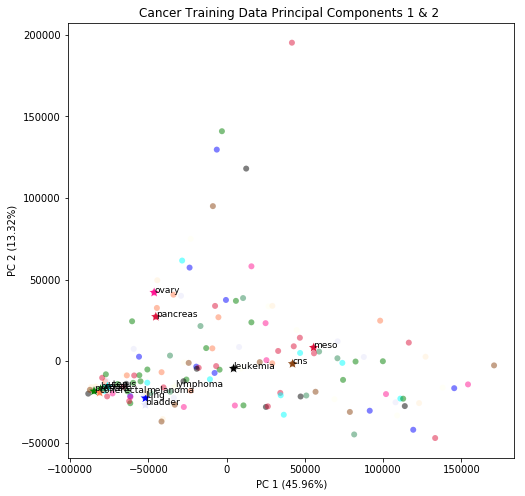

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(X_train[:,0], X_train[:,1],
            c=cvec, edgecolor='', alpha=0.5)

# Add the labels
for name in selected_names:

    # Get the index of the name
    i = labels.index(name)

    # Add the text label
    labelpad = 0.01   # Adjust this based on your dataset
    plt.text(X_train[i,0]+labelpad, X_train[i,1]+labelpad, name, fontsize=9)

    # Mark the labeled observations with a star marker
    plt.scatter(X_train[i,0], X_train[i,1],
                c=cvec[i], vmin=min(cvec), vmax=max(cvec),
                edgecolor='', marker='*', s=100)

# Add the axis labels
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 
plt.title('Cancer Training Data Principal Components 1 & 2 ')
# Done
plt.show()


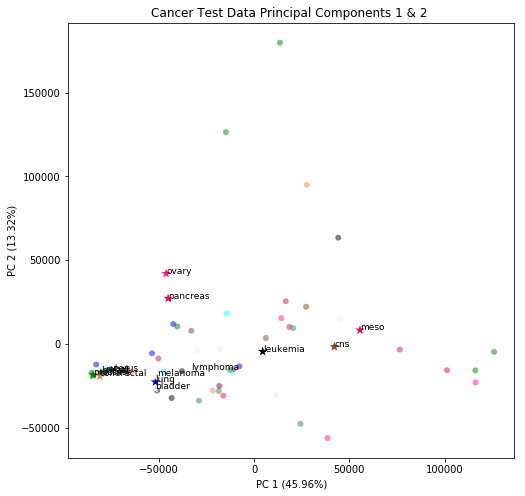

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(X_test[:,0], X_test[:,1],
            c=cvec, edgecolor='', alpha=0.5)

# Add the labels
for name in selected_names:

    # Get the index of the name
    i = labels.index(name)

    # Add the text label
    labelpad = 0.01   # Adjust this based on your dataset
    plt.text(X_train[i,0]+labelpad, X_train[i,1]+labelpad, name, fontsize=9)

    # Mark the labeled observations with a star marker
    plt.scatter(X_train[i,0], X_train[i,1],
                c=cvec[i], vmin=min(cvec), vmax=max(cvec),
                edgecolor='', marker='*', s=100)

# Add the axis labels
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 
plt.title('Cancer Test Data Principal Components 1 & 2 ')
# Done
plt.show()


### Self Organizing Map (SOM)

In [32]:
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
sc = MinMaxScaler(feature_range = (0,1))

In [33]:
yeast_data.shape

(2884, 17)

### Datos de Levadura

In [34]:
yeast_scaled = sc.fit_transform(yeast_data)
som = MiniSom(x = 10, y = 10, input_len = 17, sigma=1.0, learning_rate = 0.5)
som.random_weights_init(yeast_scaled)
som.train_random(data = yeast_scaled, num_iteration = 100)

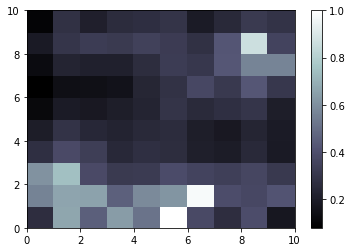

In [35]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar() 

for i, x in enumerate(yeast_scaled):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Datos de Humano

In [36]:
human_scaled = sc.fit_transform(human_data)

In [37]:
human_scaled.shape

(4026, 96)

In [38]:
human_scaled = sc.fit_transform(human_data)
som = MiniSom(x = 10, y = 10, input_len = 96, sigma=1.0, learning_rate = 0.5)
som.random_weights_init(human_scaled)
som.train_random(data = human_scaled, num_iteration = 100)

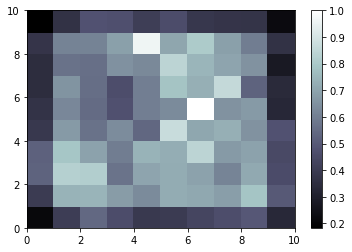

In [212]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar() 

for i, x in enumerate(human_scaled):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Datos de Cáncer

In [39]:
cancer_scaled = sc.fit_transform(X_cancer_train.T)
som = MiniSom(x = 10, y = 10, input_len = 16063, sigma=1.0, learning_rate = 0.5)
som.random_weights_init(cancer_scaled)
som.train_random(data = cancer_scaled, num_iteration = 100)

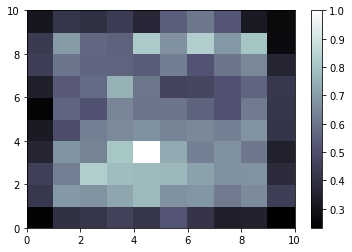

In [454]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar() 

for i, x in enumerate(X_cancer_test.T):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markersize = 10,
         markeredgewidth = 2)
show()

# Datos de Bicluster

In [40]:
%%R -o yeast_bicluster,human_bicluster

yeast_bicluster <- read.table('yeastbicluster.dat', sep=",")
human_bicluster <- read.table('humanbicluster.dat', sep=",")
cancer_bicluster <- read.table('cancerbicluster.dat', sep=",")

yeast_bicluster <- yeast_bicluster[,-18]
human_bicluster <- human_bicluster[,-18]

In [41]:
%R dim(cancer_bicluster)

array([14004,   144], dtype=int32)

## PCA

### Datos de Levadura

In [42]:
pca = PCA(n_components = 2)
yeastbc_pca_train = pca.fit_transform(yeast_bicluster)
yeastbc_explained_variance = pca.explained_variance_ratio_

In [43]:
yeastbc_explained_variance

array([0.9280727 , 0.01660746])

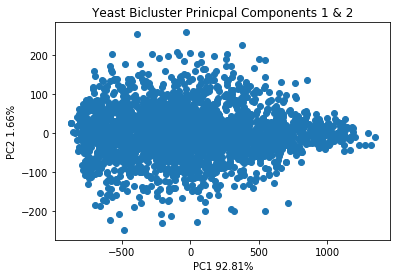

In [44]:
plt.scatter(yeastbc_pca_train[:,0],
            yeastbc_pca_train[:,1])
plt.xlabel('PC1'+ ' ' + 
           str(("%.2f" % (yeastbc_explained_variance[0]*100))+'%'))
plt.ylabel('PC2'+ ' ' + 
           str(("%.2f" % (yeastbc_explained_variance[1]*100))+'%'))
plt.title('Yeast Bicluster Prinicpal Components 1 & 2')
plt.show()

### Datos de Humano

In [45]:
pca = PCA(n_components = 2)
humanbc_pca_train = pca.fit_transform(human_bicluster)
humanbc_explained_variance = pca.explained_variance_ratio_

In [46]:
humanbc_explained_variance

array([0.07143786, 0.05097671])

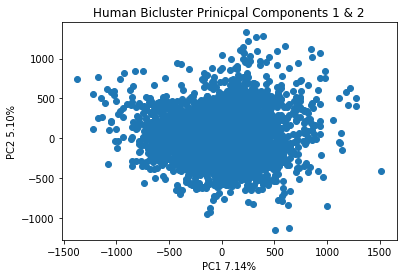

In [47]:
plt.scatter(humanbc_pca_train[:,0],
            humanbc_pca_train[:,1])
plt.xlabel('PC1'+ ' ' + 
           str(("%.2f" % (humanbc_explained_variance[0]*100))+'%'))
plt.ylabel('PC2'+ ' ' + 
           str(("%.2f" % (humanbc_explained_variance[1]*100))+'%'))
plt.title('Human Bicluster Prinicpal Components 1 & 2')
plt.show()

### Datos de Cáncer

In [48]:
pca = PCA(n_components = 2)
humanbc_pca_train = pca.fit_transform(human_bicluster)
humanbc_explained_variance = pca.explained_variance_ratio_

## SOM

### Datos de Levadura

In [49]:
yeast_bicluster.shape

(2723, 17)

In [50]:
yeast_bc_scaled = sc.fit_transform(yeast_bicluster)
som = MiniSom(x = 10, y = 10, input_len = 17, sigma=1.0, learning_rate = 0.5)
som.random_weights_init(yeast_bc_scaled)
som.train_random(data = yeast_bc_scaled, num_iteration = 100)

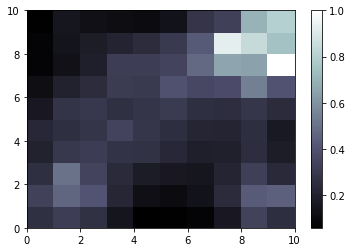

In [281]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar() 

for i, x in enumerate(yeast_bc_scaled):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Datos de Humano

In [51]:
human_bicluster.shape

(3978, 96)

In [52]:
human_bc_scaled = sc.fit_transform(human_bicluster)
som = MiniSom(x = 10, y = 10, input_len = 96, sigma=1.0, learning_rate = 0.5)
som.random_weights_init(human_bc_scaled)
som.train_random(data = human_bc_scaled, num_iteration = 100)

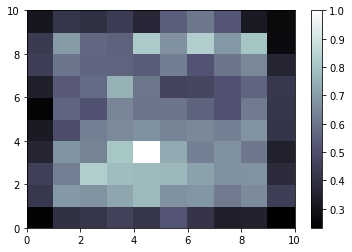

In [284]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar() 

for i, x in enumerate(human_bc_scaled):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Datos de Cáncer

## Evaluación de cálidad de cluster

Efectuaremos análisis exploratorio mediante el uso de dos métricas: <br>
    * Calinski-Harabaz Score
    * Silhouette Coefficient
    
Con el motivo de indagar si mejora la cálidad de las proyecciones de PCA cuando se aplica el biclustering a los datos originales, para levadura, humano y cáncer

In [10]:
from sklearn import metrics

In [ ]:
pca_data = {'yeast':yeast_pca_train,
           'human':human_pca_train,
           'cancer_train':X_train,
           'cancer_test':X_test}

pca_preds = {}

evaluation_metrics = {'Silhouette_Score': 'silhouette_score',
                      'Calinski_Harabaz' :'calinski_harabaz_score'}

### Evaluación de clusters sobre proyecciones de PCA

#### Datos de Levadura

In [53]:
scores = {}
for metric_name, metric_model in unsupervised_evaluation_metrics.items():
    evaluation_scores = {}
    for i in pca_data:
        evaluation_metric = getattr(metrics,metric_model)
        evaluation_scores[i] = evaluation_metric(unsupervised_data[i],unsupervised_preds[i])
    scores = 

array([[-260.5193594 ,  -45.3415256 ],
       [-309.61822559,  -64.83806388],
       [ 994.19744134,  -35.64230926],
       ...,
       [-130.89251525,   22.74069342],
       [  41.66646923,   14.29844035],
       [ 842.97663612,   18.03185486]])

#### Datos de Humano

#### Datos de Cáncer

### Evaluación de clusters sobre proyecciones de SOM

#### Datos de Levadura

#### Datos de Humano

#### Datos de Cáncer